# Eco-evolutionary games in noisy environments

In [1]:
# Libraries

import numpy as np
from math import *
import random as rd
import matplotlib.pyplot as plt
import scipy
from scipy import *
from functools import lru_cache

## Set of the game structure and definition of the dynamical system

In [35]:
# Panel b in Tilman et al. 2020: mixed equilibrium or cycles
Delta_1L=2
delta_0H=1
Delta_1H=3
delta_0L=3

In [43]:
# Panel a in Tilman et al. 2020: bistability
Delta_1L=-2
delta_0H=-1
Delta_1H=3
delta_0L=-3

In [709]:
# Panel d in Tilman et al. 2020: high impact only
Delta_1L=2
delta_0H=-1
Delta_1H=-3
delta_0L=-3

In [478]:
# Panel c in Tilman et al. 2020: low impact only
Delta_1L=-2
delta_0H=1
Delta_1H=-3
delta_0L=-3

In [5]:
# Initial conditions (x,m)

initial_conditions=[(0.9,0.9),(0.8,0.7),(0.5,0.7),(0.8,0.3),(0.2,0.3),(0.1,0.3)]
#initial_conditions=[(0.9,0.9),(0.9,0.9),(0.9,0.9),(0.9,0.9),(0.9,0.9),(0.9,0.9)]
#initial_conditions=[(0.999,0.999),(0.999,0.999),(0.999,0.999),(0.999,0.999),(0.999,0.999),(0.999,0.999)]
#initial_conditions=[(0.1,0.5),(0.1,0.5),(0.1,0.5),(0.1,0.5),(0.1,0.5),(0.1,0.5)]
#initial_conditions=[(0.82,0.62),(0.82,0.62),(0.82,0.62),(0.82,0.62),(0.82,0.62),(0.82,0.62)]
#initial_conditions=[(0.82,0.62)]
#initial_conditions=[(0.5,0.7),(0.5,0.7),(0.5,0.7),(0.5,0.7),(0.5,0.7),(0.5,0.7)]

# Random payoff values
T0=2
P0=1
R1=3
S1=2

R0=T0+delta_0L
S0=P0+delta_0H
T1=R1+Delta_1L
P1=S1+Delta_1H

# Parameters

epsilon=1 #timescale parameter
r=0.5 #growth rate
q=0.8 #maps effects of the individuals to reduction of resources
e_L=0.1 #harvest effort of low-impact individuals
e_H=0.56 #harvest effort of high-impact individuals

s=1 #selection coefficient
N=1000
k=10 #carrying capacity of the environment
lambd=1.2 #birth rate
mu=lambd-r #death rate

dt=0.01
time_tot=1000

In [6]:
# Game played with the rescaling of the environment made by Tilman et al.

m_low=1-q*e_L/r
m_high=1-q*e_H/r

def delta_0L_n():
    return (1-m_high)*delta_0L-m_high*Delta_1L
def delta_0H_n():
    return (1-m_high)*delta_0H-m_high*Delta_1H
def Delta_1L_n():
    return -(1-m_low)*delta_0L+m_low*Delta_1L
def Delta_1H_n():
    return -(1-m_low)*delta_0H+m_low*Delta_1H

print(m_low,m_high)

0.84 0.10399999999999987


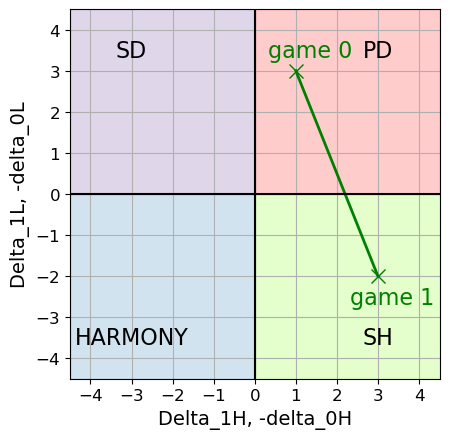

In [49]:
# Dilemma phase plane

fig, ax = plt.subplots()

ymin, ymax=-4.5,4.5
xmin, xmax=-4.5,4.5


ax.plot([Delta_1H, -delta_0H], [Delta_1L, -delta_0L], linestyle="-", marker="x", color="g", linewidth=2, markersize=10)
#ax.plot([Delta_1H_n(), -delta_0H_n()], [Delta_1L_n(), -delta_0L_n()], marker="x", color="b") # game played with the rescaling of the environment made by Tilman et al.
ax.annotate("game 1", (Delta_1H, Delta_1L), color="g", textcoords="offset points", xytext=(-20,-20), ha="left", fontsize=16)
ax.annotate("game 0", (-delta_0H, -delta_0L), color="g", textcoords="offset points", xytext=(-20,10), ha="left", fontsize=16)
ax.vlines(0, color="k", ymin=ymin, ymax=ymax)
ax.hlines(0, color="k", xmin=xmin, xmax=xmax)
ax.set_xticks(np.arange(xmin+0.5, xmax + 1.5, 1))
ax.set_yticks(np.arange(ymin+0.5, ymax + 1.5, 1))
ax.grid()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Delta_1H, -delta_0H", fontsize=14)
ax.set_ylabel("Delta_1L, -delta_0L", fontsize=14)

ax.fill_betweenx([0, ymax], xmin, 0, color="rebeccapurple", alpha=0.2)
ax.fill_betweenx([0, ymax], 0, xmax, color="red", alpha=0.2)
ax.fill_betweenx([ymin, 0], xmin, 0, color="tab:blue", alpha=0.2)
ax.fill_betweenx([ymin, 0], 0, xmax, color="lawngreen", alpha=0.2)

ax.text(-3, 3.5, "SD", ha='center', va='center', fontsize=16)
ax.text( 3, 3.5, "PD", ha='center', va='center', fontsize=16)
ax.text(-3, -3.5, "HARMONY", ha='center', va='center', fontsize=16)
ax.text( 3, -3.5, "SH", ha='center', va='center', fontsize=16)

ax.tick_params(labelsize=12)
ax.set_aspect('equal', adjustable='box')
plt.savefig("GIDRAD.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Payoffs

def pi_L(x,m):
    return (1-m)*(R0*x+S0*(1-x))+m*(R1*x+S1*(1-x))

def pi_H(x,m):
    return (1-m)*(T0*x+P0*(1-x))+m*(T1*x+P1*(1-x))

In [7]:
# ODEs which govers x and m

def renewing(t,y):
    x,m=y
    dm_dt=s*epsilon*(r*m*(1-m)-q*m*(e_L*x+e_H*(1-x)))
    if m>=1:
        m=1
    dx_dt=s*x*(1-x)*(pi_L(x,m)-pi_H(x,m))
    return np.array([dx_dt,dm_dt])

def decaying(t,y):
    x,m=y
    dx_dt=s*x*(1-x)*(pi_L(x,m)-pi_H(x,m))
    dm_dt=s*epsilon*(-alpha*m*k+e_L*x+e_H*(1-x))
    return np.array([dx_dt,dm_dt])

In [52]:
# If you choose renewing resources

def dynamics(t,y):
    return renewing(t,y)

def calc_n_from_m(m):
    return (m-(1-q*e_H/r)) / ((e_H-e_L)*q/r)

def calc_m_from_n(n):
    return (e_H-e_L)*q*n/r + (1-q*e_H/r)

In [ ]:
# If you choose decaying resources

def dynamics(t,y):
    return decaying(t,y)

## Simulation of the SDEs to observe trajectories

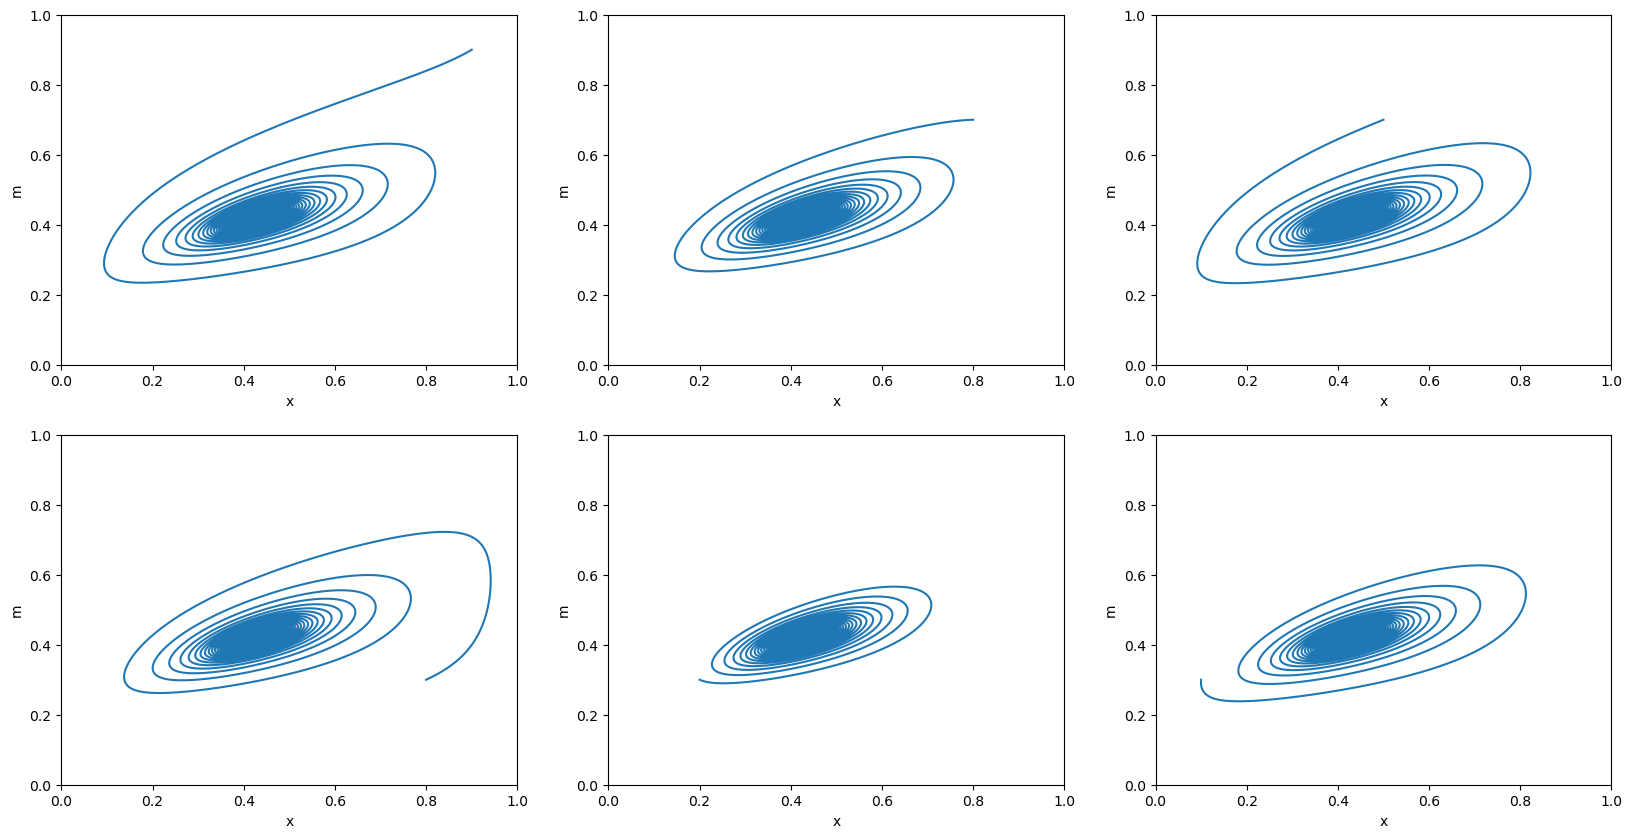

In [129]:
# Simulation of the SDEs and plot of the phase portrait, for 6 different initial conditions

k=10000

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax=ax.ravel()
trajectory={}
for j,ic in enumerate(initial_conditions):
    list_x=[ic[0]]
    list_m=[ic[1]]
    t=0
    for i in range(int(time_tot/dt)-1):
        y=list_x[-1],list_m[-1]
        delta=dynamics(t,y)
        list_x.append(y[0]+delta[0]*dt)
        new_m=y[1]+delta[1]*dt + sqrt(s*epsilon) * sqrt(((lambd+mu)*y[1]+(lambd-mu)*y[1]**2)/k) * sqrt(dt)*np.random.normal(0,1)
        if new_m<=0:
            new_m=1/N
        list_m.append(new_m)
    trajectory[j]=(list_x,list_m)
    ax[j].plot(list_x,list_m)
    ax[j].set_ylim(0, 1)
    ax[j].set_xlim(0, 1)
    ax[j].set(xlabel="x")
    ax[j].set(ylabel="m")
#plt.savefig("phase_diagram-high_epsilon.png", dpi=300, bbox_inches='tight')
plt.show()

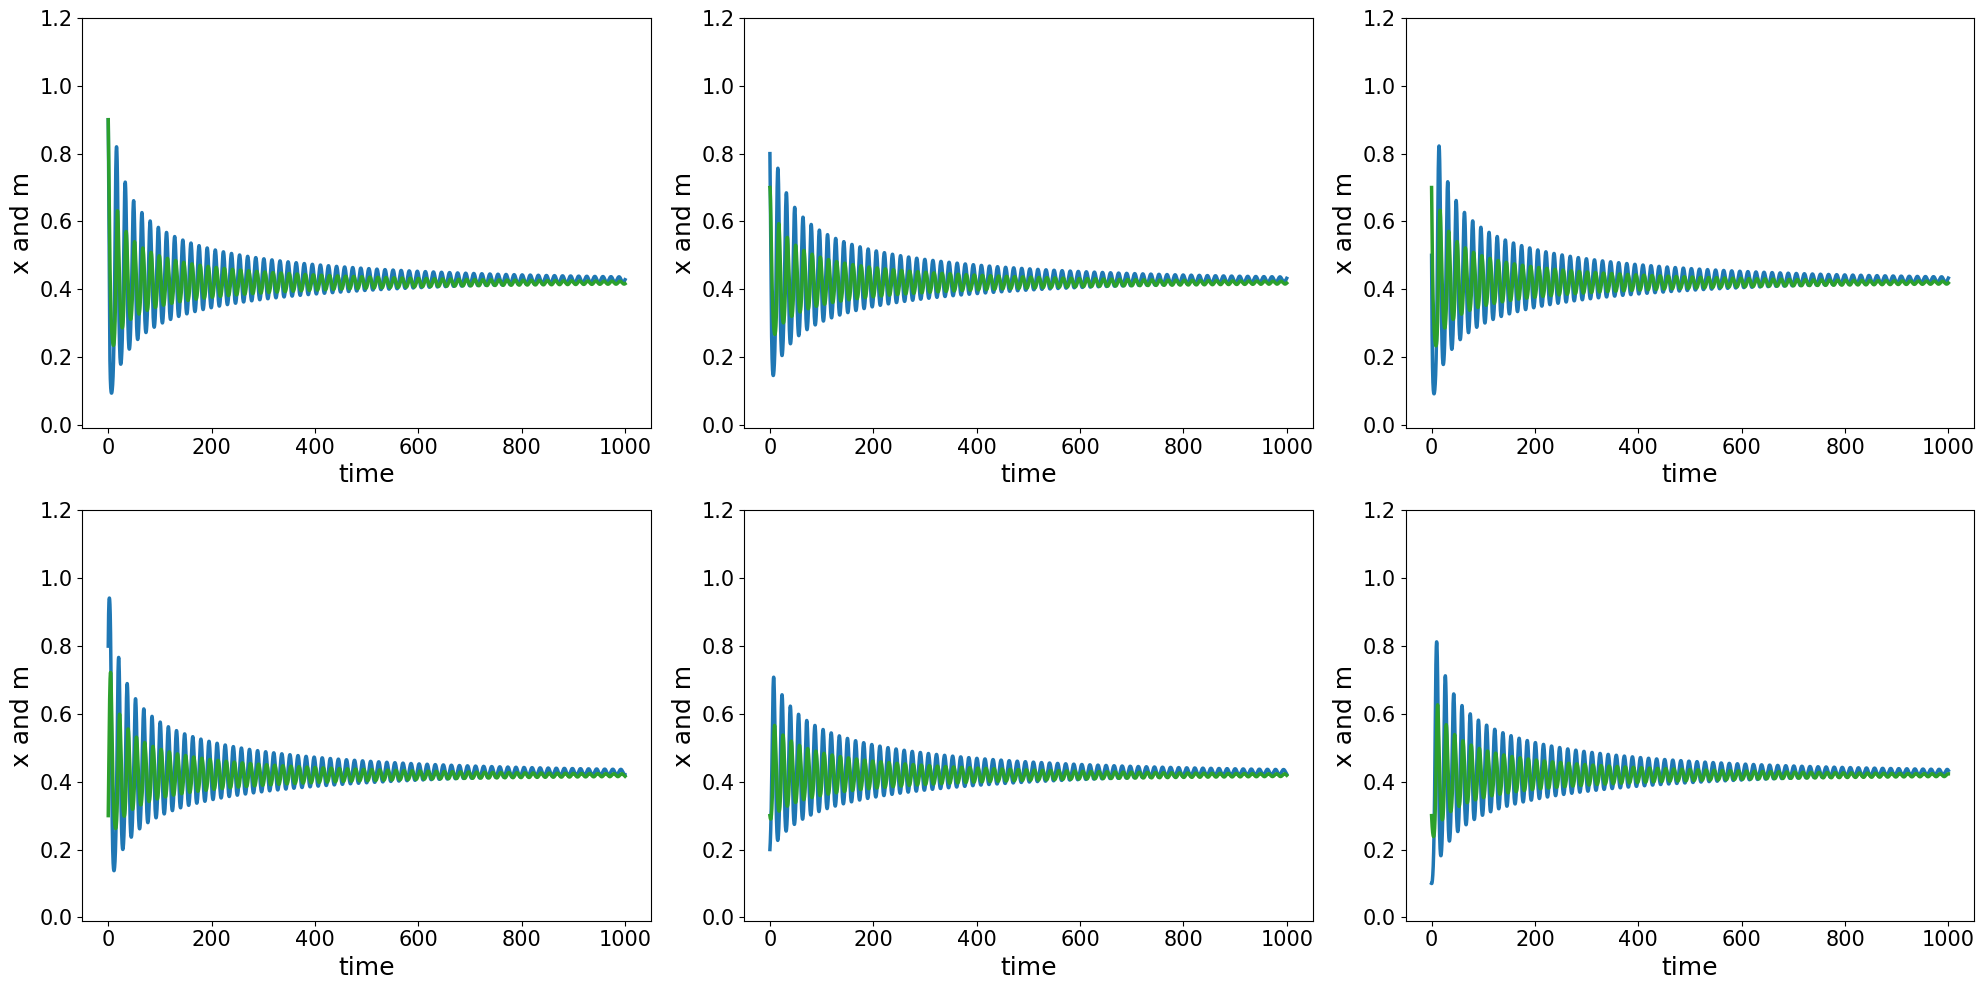

In [130]:
# Plot of trajectories of x (in blue) and m (in green) over time

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax=ax.ravel()
for j,ic in enumerate(initial_conditions):
    ax[j].plot(np.linspace(0,time_tot,int(time_tot/dt)),trajectory[j][0], linewidth=2.5)
    ax[j].plot(np.linspace(0,time_tot,int(time_tot/dt)),trajectory[j][1],color="tab:green", linewidth=2.5)
    ax[j].set_ylim(-0.01, 1.01)
    ax[j].set_ylim(-0.01, 1.2)
    ax[j].set_xlabel("time", fontsize=18)
    ax[j].set_ylabel("x and m", fontsize=18)
    ax[j].tick_params(labelsize=15)
plt.savefig("over_time.png", dpi=300, bbox_inches='tight')
fig.tight_layout()
plt.show()

In [214]:
# Calculation of e_crit to obtain cycles

A = np.sqrt(4 * Delta_1L * delta_0H + (Delta_1H - delta_0L)**2) - Delta_1H - delta_0L
B = np.sqrt(4 * Delta_1L * delta_0H + (Delta_1H - delta_0L)**2) - 2 * Delta_1L + Delta_1H - delta_0L
C = np.sqrt(4 * Delta_1L * delta_0H + (Delta_1H - delta_0L)**2) - Delta_1H + delta_0L - 2 * delta_0H
D = 4 * (Delta_1L - Delta_1H + delta_0L - delta_0H)

E = q * ((Delta_1H - delta_0L) * (e_H + e_L) - 2 * (Delta_1L * e_H - delta_0H * e_L))
F = q * (e_H - e_L) * np.sqrt(4 * Delta_1L * delta_0H + (Delta_1H - delta_0L)**2)
G = 2 * r * (Delta_1L - Delta_1H + delta_0L - delta_0H)

ecrit = (A * B * C) / (D * (E + F + G))
ecrit

1.8821855821868432

## Simulations under timescale separation (epsilon low) and stationary distributions

Choose a combination of game and define x as a function of m according to the bifurcation diagram

In [300]:
# Panel b3 snowdrift-snowdrift

Delta_1L=2
delta_0H=1
Delta_1H=-3
delta_0L=-3


def calc_x(n):
    if n<0:
        return -delta_0H / ((delta_0L-delta_0H))
    if n>1:
        return Delta_1H / (Delta_1H-Delta_1L)
    return (Delta_1H*n - delta_0H*(1-n)) / ((delta_0L-delta_0H)*(1-n) + (Delta_1H-Delta_1L)*n)

In [143]:
# Panel b1 harmony-snowdrift

Delta_1L=2
delta_0H=1
Delta_1H=-3
delta_0L=3


def calc_x(n):
    if n<delta_0L/(delta_0L+Delta_1L):
        return 1
    if n>1:
        return Delta_1H / (Delta_1H-Delta_1L)
    return (Delta_1H*n - delta_0H*(1-n)) / ((delta_0L-delta_0H)*(1-n) + (Delta_1H-Delta_1L)*n)

In [12]:
# Panel b4 snowdrift-PD

Delta_1L=2
delta_0H=1
Delta_1H=3
delta_0L=-3

def calc_x(n):
    if n>delta_0H/(delta_0H+Delta_1H):
        return 0
    return (Delta_1H*n - delta_0H*(1-n)) / ((delta_0L-delta_0H)*(1-n) + (Delta_1H-Delta_1L)*n)

In [151]:
# Panel b2 harmony - prisoners' dilemma -> mixed equilibrium

Delta_1L=3
delta_0H=3
Delta_1H=2
delta_0L=1


def calc_x(m):
    if m>delta_0H/(delta_0H+Delta_1H):
        return 0
    if m<delta_0L/(delta_0L+Delta_1L):
        return 1
    return (Delta_1H*m - delta_0H*(1-m)) / ((delta_0L-delta_0H)*(1-m) + (Delta_1H-Delta_1L)*m)

In [160]:
# Panel b2 harmony - prisoners' dilemma -> cycles

Delta_1L=2
delta_0H=1
Delta_1H=3
delta_0L=3

# delta_0L/(delta_0L+Delta_1L)

def calc_x(m, previous_x):
    if m<delta_0H/(delta_0H+Delta_1H):
        return 1
    if m>delta_0L/(delta_0L+Delta_1L):
        return 0
    if previous_x==1:
        return 1
    return 0


In [402]:
# Panel a3 Prisoners' dilemma - harmony

Delta_1L=-2
delta_0H=-1
Delta_1H=-3
delta_0L=-3

def calc_x(m):
    if m<delta_0H/(delta_0H+Delta_1H):
        return 0
    if m>delta_0L/(delta_0L+Delta_1L):
        return 1
    return (Delta_1H*m - delta_0H*(1-m)) / ((delta_0L-delta_0H)*(1-m) + (Delta_1H-Delta_1L)*m)


In [10]:
# Panel d3 PD-snowdrift

Delta_1L=2
delta_0H=-1
Delta_1H=-3
delta_0L=-3


def calc_x(m):
    if m<delta_0H/(delta_0H+Delta_1H):
        return 0
    if m>1:
        return Delta_1H / (Delta_1H-Delta_1L)
    return (Delta_1H*m - delta_0H*(1-m)) / ((delta_0L-delta_0H)*(1-m) + (Delta_1H-Delta_1L)*m)

In [151]:
# Panel c3 snowdrift-harmony

Delta_1L=-2
delta_0H=1
Delta_1H=-3
delta_0L=-3


def calc_x(m):
    if m>delta_0L/(delta_0L+Delta_1L):
        return 1
    return (Delta_1H*m - delta_0H*(1-m)) / ((delta_0L-delta_0H)*(1-m) + (Delta_1H-Delta_1L)*m)

In [106]:
# Panel a4 PD-SH

Delta_1L=-2
delta_0H=-1
Delta_1H=3
delta_0L=-3


def calc_x(n):
    if n>delta_0L/(delta_0L+Delta_1L):
        return 0
    else:
        return 0

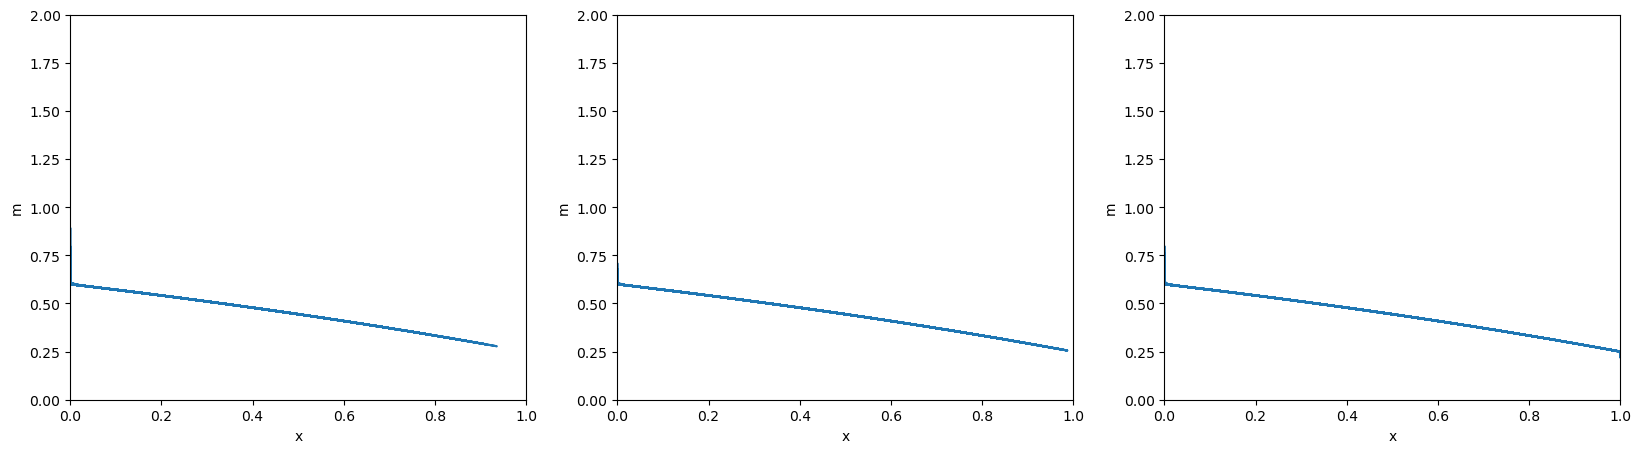

In [56]:
# Simulation of the SDE of m under timescale separation and plot of the phase portrait, for 3 different initial conditions

initial_m=[0.4,0.4,0.4]

N=1000
k=100
s=0.1
time_tot=500

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax=ax.ravel()
trajectory={}
for j,ic in enumerate(initial_m):
    list_m=[ic]
    list_x=[calc_x(ic)]
    for i in range(int(time_tot/dt)-1):
        x,m=list_x[-1],list_m[-1]
        new_m= m + s*((r*m*(1-m)-q*m*(e_L*x+e_H*(1-x))))*dt + sqrt(s*((lambd+mu)*m+r*m**2+q*m*(e_L*x+e_H*(1-x)))/k)*np.random.normal(0,1)*sqrt(dt)
        if new_m<=0:
            new_m=1/1000
        list_m.append(new_m)
        list_x.append(calc_x(new_m))
    trajectory[j]=(list_x,list_m)
    ax[j].plot(list_x,list_m)
    ax[j].set_ylim(0, 2)
    ax[j].set_xlim(0, 1)
    ax[j].set(xlabel="x")
    ax[j].set(ylabel="m")
plt.show()

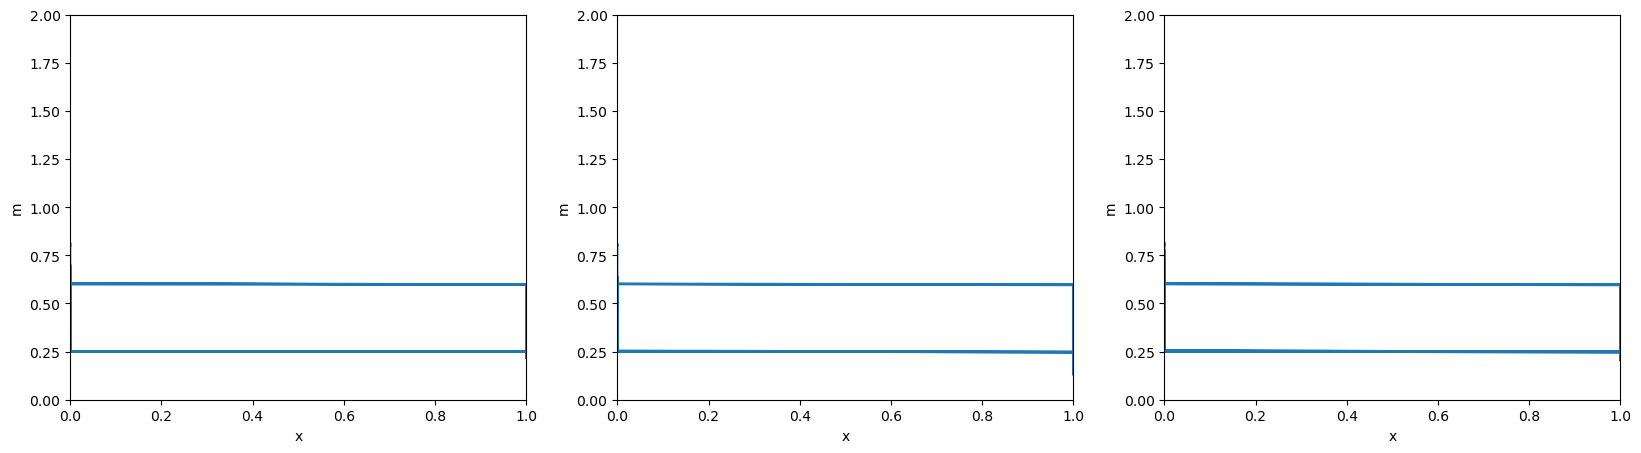

In [94]:
# Same but in the special case of cycles: there is hysteresis in the bifurcation diagram,the value of x depends on it previous value

initial_m=[0.8,0.8,0.8]

N=1000
k=100
s=0.1
time_tot=500


# Phase portraits
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax=ax.ravel()
trajectory={}
for j,ic in enumerate(initial_m):
    list_m=[ic]
    list_x=[calc_x(ic,0)]
    for i in range(int(time_tot/dt)-1):
        x,m=list_x[-1],list_m[-1]
        new_m= m + s*((r*m*(1-m)-q*m*(e_L*x+e_H*(1-x))))*dt + sqrt(s*((lambd+mu)*m+r*m**2+q*m*(e_L*x+e_H*(1-x)))/k)*np.random.normal(0,1)*sqrt(dt)
        if new_m<=0:
            new_m=1/1000
        list_m.append(new_m)
        list_x.append(calc_x(new_m,x))
    trajectory[j]=(list_x,list_m)
    ax[j].plot(list_x,list_m)
    ax[j].set_ylim(0, 2)
    ax[j].set_xlim(0, 1)
    ax[j].set(xlabel="x")
    ax[j].set(ylabel="m")
plt.show()

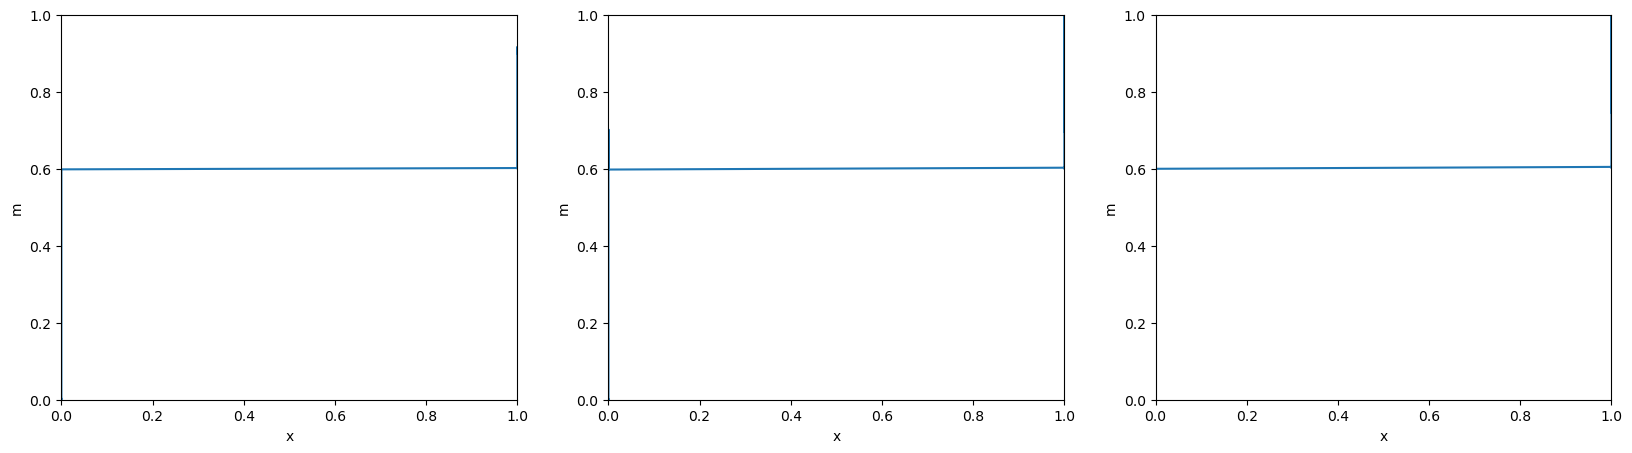

In [97]:
# Same but in the special case of stag-hunt game combined with another game: x switches and is stuck at 0 for the rest of the time

initial_m=[0.9,0.9,0.9]


epsilon=0.1
s=0.1
time_tot=500
k=100

# Phase portraits
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax=ax.ravel()
trajectory={}
for j,ic in enumerate(initial_m):
    list_m=[ic]
    list_x=[calc_x(ic)]
    switch="on"
    for i in range(int(time_tot/dt)-1):
        x,m=list_x[-1],list_m[-1]
        new_m= m + s*((r*m*(1-m)-q*m*(e_L*x+e_H*(1-x))))*dt + sqrt(s*((lambd+mu)*m+r*m**2+q*m*(e_L*x+e_H*(1-x)))/k)*np.random.normal(0,1)*sqrt(dt)
        if new_m<=0:
            new_m=1/1000
        list_m.append(new_m)
        
        if switch == "on" and new_m < delta_0L/(delta_0L+Delta_1L):
            switch = "off"

        if switch == "off":
            list_x.append(0)
        else:
            list_x.append(calc_x(new_m))
            
    trajectory[j]=(list_x,list_m)
    ax[j].plot(list_x,list_m)
    ax[j].set_ylim(0, 1)
    ax[j].set_xlim(0, 1)
    ax[j].set(xlabel="x")
    ax[j].set(ylabel="m")
plt.show()

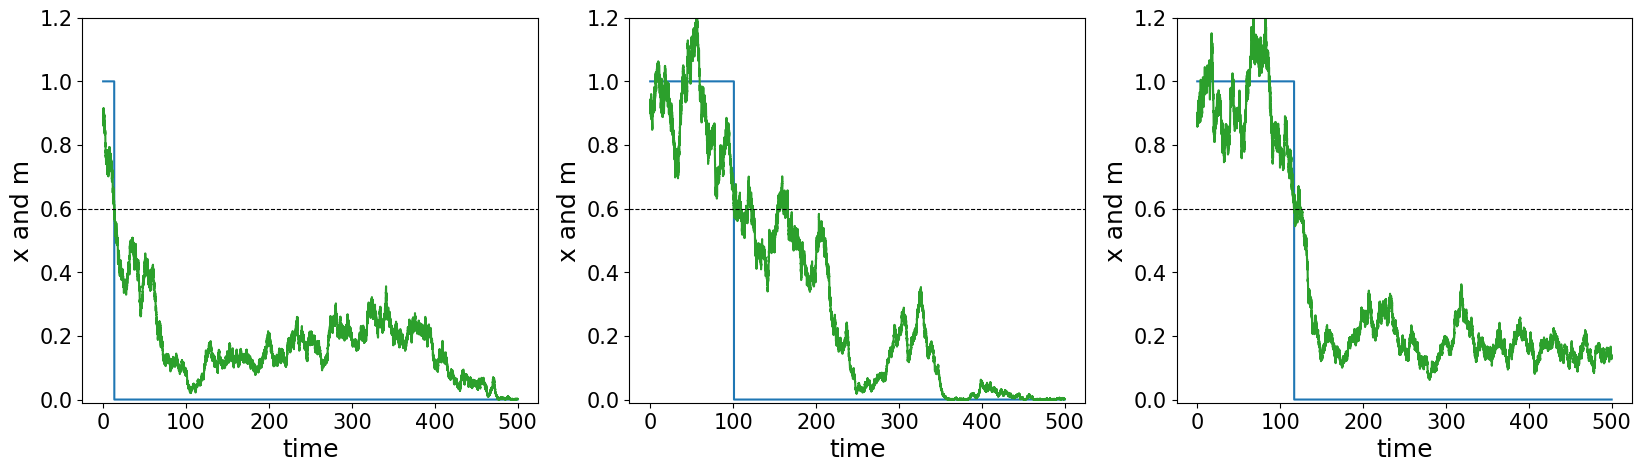

In [99]:
# Plot of x and m over time

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax=ax.ravel()
for j,ic in enumerate(initial_m):
    ax[j].plot(np.linspace(0,time_tot,int(time_tot/dt)),trajectory[j][0])
    ax[j].plot(np.linspace(0,time_tot,int(time_tot/dt)),trajectory[j][1],color="tab:green")
    ax[j].set_ylim(-0.01, 1.2)
    ax[j].set_xlabel("time", fontsize=18)
    ax[j].set_ylabel("x and m", fontsize=18)
    ax[j].tick_params(labelsize=15)
    ax[j].axhline(0.6, linestyle="--", color="k", linewidth=0.8)
    #ax[j].axhline(0.25, linestyle="--", color="k", linewidth=0.8)
plt.savefig("over_time_sep.png", dpi=300, bbox_inches='tight')
plt.show()


In [9]:
# Functions to calculate the analytical stationary distribution under timescale separation

k=100

# With deterministic actions of the individuals on the environment
@lru_cache(maxsize=None)
def integral_scalar(m,k):
    return scipy.integrate.quad(
        lambda u: (r*(1-u) - q*(e_L*calc_x(u) + e_H*(1-calc_x(u)))) * k / ((lambd + mu) + r*u),
        0.0001, m
    )[0]

def integral(m):
    if np.isscalar(m):
        return integral_scalar(float(m),k)
    else:
        return np.array([integral_scalar(float(mi),k) for mi in m])
        
def stationary_distrib(m):
    return (k/(s*epsilon*((lambd+mu)*m+(lambd-mu)*m**2))) * np.exp(2*integral(m))

def integration_constant():
    return 1/(scipy.integrate.quad(stationary_distrib,0.0001,9.999)[0])


# With noisy actions of the individuals on the environment
@lru_cache(maxsize=None)
def integral_noisy_actions_scalar(m,k):
    return scipy.integrate.quad(
        lambda u: (
            (r * (1 - u) - q * (e_L * calc_x(u) + e_H * (1 - calc_x(u)))) * k /
            ((lambd + mu) + r * u + q * (e_L * calc_x(u) + e_H * (1 - calc_x(u))))
        ),
        0.0001, m
    )[0]

def integral_noisy_actions(m):
    if np.isscalar(m):
        return integral_noisy_actions_scalar(float(m),k)
    else:
        return np.array([integral_noisy_actions_scalar(float(mi),k) for mi in m])
    
def stationary_distrib_noisy_actions(m):
    return (k/(s*epsilon*((lambd+mu)*m+(lambd-mu)*m**2+q*m*(e_L*calc_x(m)+e_H*(1-calc_x(m)))))) * np.exp(2*integral(m))

def integration_constant_noisy_actions():
    return 1/(scipy.integrate.quad(stationary_distrib_noisy_actions,0.0001,0.9999)[0])

C:\Users\bodin\AppData\Local\Temp\ipykernel_13300\3448062336.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return (k/(s*epsilon*((lambd+mu)*m+(lambd-mu)*m**2))) * np.exp(2*integral(m))


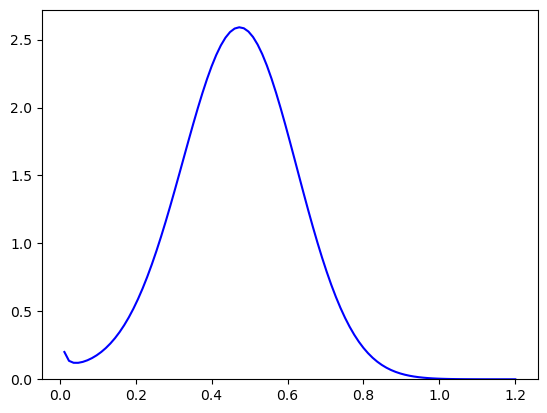

In [299]:
# Plot of the analytical stationary distribution alone

a=Delta_1H+delta_0H
b=-delta_0H
c=Delta_1H-Delta_1L-delta_0L+delta_0H
d=delta_0L-delta_0H

n_linspace=np.linspace(0.,1.2,100)
plt.plot(n_linspace,[integration_constant()*stationary_distrib(ni) for ni in n_linspace],color=("b"))
plt.ylim(0)
plt.show()

C:\Users\bodin\AppData\Local\Temp\ipykernel_13300\2403961341.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return (k/(s*epsilon*((lambd+mu)*m+(lambd-mu)*m**2))) * np.exp(2*integral(m))


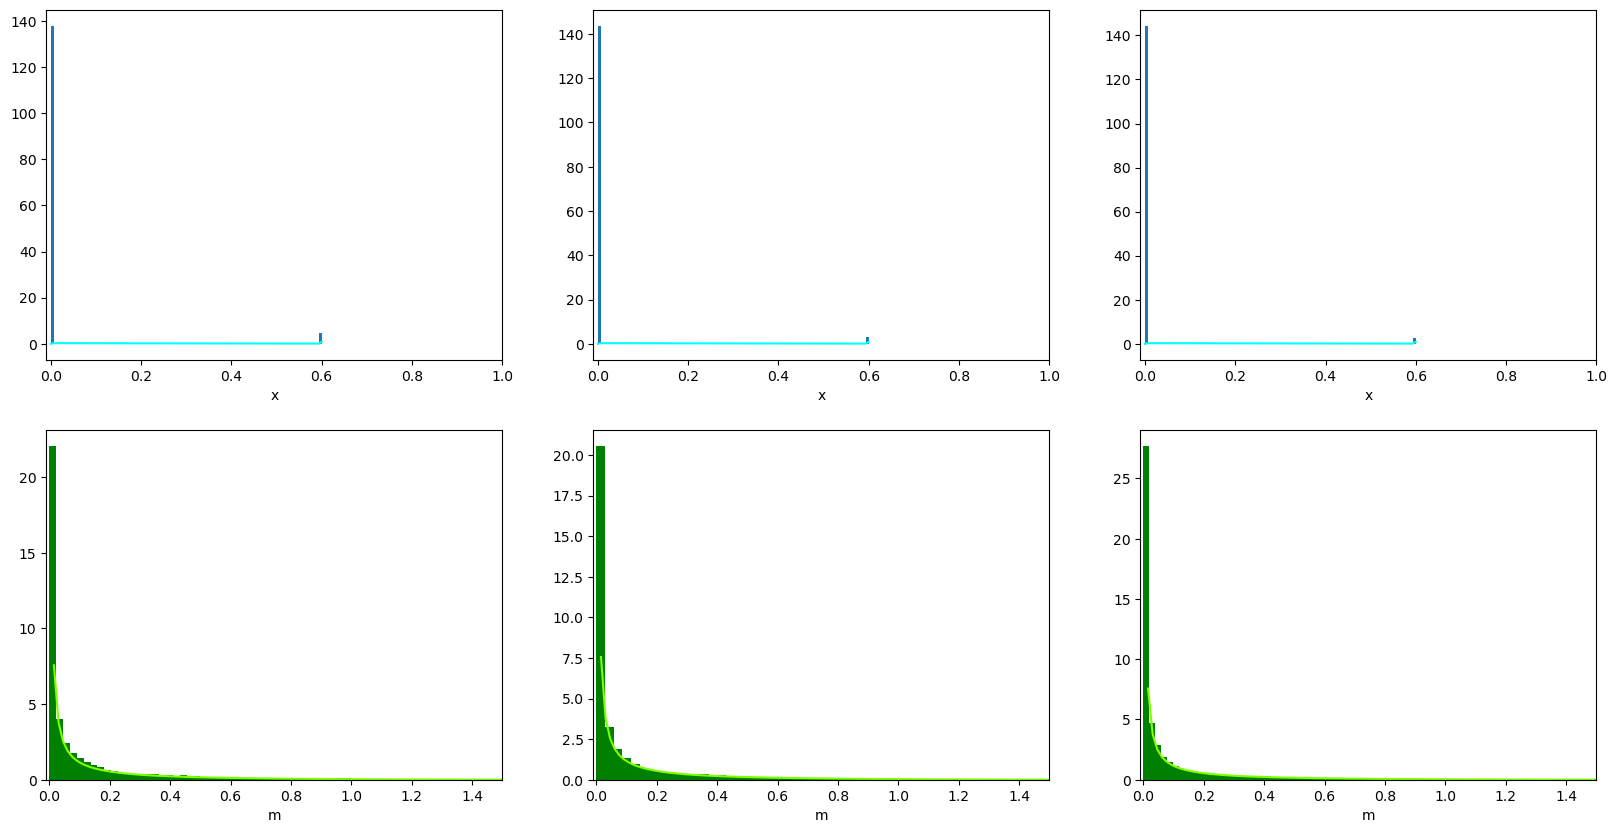

In [764]:
# Plot of the empirical stationary distribution and of the corresponding analytical stationary distribution

a=Delta_1H+delta_0H
b=-delta_0H
c=Delta_1H-Delta_1L-delta_0L+delta_0H
d=delta_0L-delta_0H

m_L=delta_0L/(delta_0L+Delta_1L)
m_H=delta_0H/(delta_0H+Delta_1H)

def calc_m(x):
    return (-b+d*x)/(a-c*x)

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax=ax.ravel()
for j,ic in enumerate(initial_m):
    ax[j].hist(trajectory[j][0],bins=100,color="#1f77b4", density=True)
    x_linspace=np.linspace(calc_x(m_L), calc_x(m_H),100)  # /!\ enter the appropriate boundaries for x: 0.001, calc_x(m_H), calc_x(m_L), 0.9999
    ax[j].plot(x_linspace,[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.0001,m_H)[0]]+
               [integration_constant()*stationary_distrib(calc_m(x_i))*((c*calc_m(x_i)+d)**2)/(abs(a*d-c*b)) for x_i in x_linspace[1:-1]]+
               [scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),m_L,0.999)[0]],
               color=("cyan"))
    ax[j].set_xlim(-0.01, 1)
    #ax[j].set_ylim(0, 1)
    ax[j].set(xlabel="x")
for j,ic in enumerate(initial_m):
    ax[j+3].hist(trajectory[j][1],bins=100,color="g", density=True)
    m_linspace=np.linspace(0.,1.5,100)
    ax[j+3].plot(m_linspace,[integration_constant()*stationary_distrib(m) for m in m_linspace],color=("chartreuse"))
    ax[j+3].set_xlim(-0.01, 1.5)
    ax[j+3].set(xlabel="m")
plt.savefig("distrib_estimation.png", dpi=300, bbox_inches='tight')
plt.show()

In [165]:
# Simulation of the SDE of m under timescale separation and plot of the phase portrait, for one initial condition

ic=0.8

time_tot=450000
time_tot=200000
#time_tot=1000
k=100

# Phase portraits
trajectory={}
list_m=[ic]
list_x=[calc_x(ic,0)]
for i in range(int(time_tot/dt)-1):
    x,m=list_x[-1],list_m[-1]
    new_m= m + ((r*m*(1-m)-q*m*(e_L*x+e_H*(1-x))))*dt + sqrt(((lambd+mu)*m+r*m**2)/k)*np.random.normal(0,1)*sqrt(dt)
    if new_m<=0:
        new_m=1/1000
    list_m.append(new_m)
    list_x.append(calc_x(new_m,x))
trajectory[0]=(list_x,list_m)

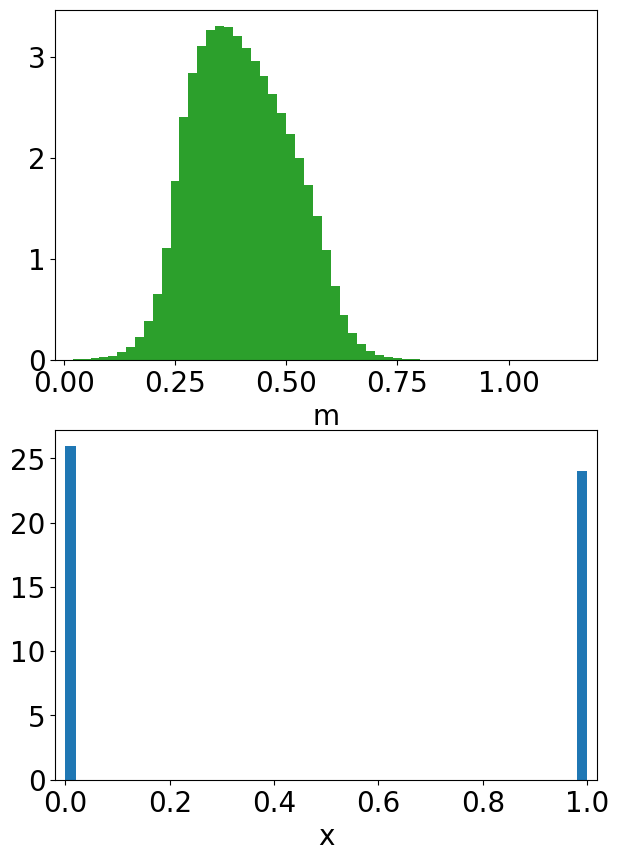

In [166]:
# Plot of the empirical stationary distribution and of the corresponding analytical stationary distribution

bin_width = 0.02

def calc_m(x):
    return (-b+d*x)/(a-c*x)

a=Delta_1H+delta_0H
b=-delta_0H
c=Delta_1H-Delta_1L-delta_0L+delta_0H
d=delta_0L-delta_0H

@lru_cache(maxsize=None)
def integral_scalar(m,k):
    return scipy.integrate.quad(
        lambda u: (r*(1-u) - q*(e_L*calc_x(u) + e_H*(1-calc_x(u)))) * k / ((lambd + mu) + r*u),
        0.0001, m
    )[0]

@lru_cache(maxsize=None)
def integral_noisy_actions_scalar(m,k):
    return scipy.integrate.quad(
        lambda u: (
            (r * (1 - u) - q * (e_L * calc_x(u) + e_H * (1 - calc_x(u)))) * k /
            ((lambd + mu) + r * u + q * (e_L * calc_x(u) + e_H * (1 - calc_x(u))))
        ),
        0.0001, m
    )[0]

m_L=delta_0L/(delta_0L+Delta_1L)
m_H=delta_0H/(delta_0H+Delta_1H)

fig, ax = plt.subplots(2,1,figsize=(7,10))
ax=ax.ravel()


bins_m = np.arange(0, min(max(list_m),1.2) + bin_width, bin_width)
ax[0].hist(trajectory[0][1],bins=bins_m,color="tab:green", density=True)
m_linspace=np.linspace(0.001,1.2,1000)
#ax[0].plot(m_linspace,integration_constant()*stationary_distrib(m_linspace),color=("k"), linewidth=4)
ax[0].set_xlim(-0.02, 1.2)
#ax[0].set_ylim(0,15)
ax[0].set_xlabel("m", fontsize=20)
ax[0].tick_params(labelsize=20)

bins_x=[0,0.02] # for PD+SH
bins_x = np.arange(0, max(list_x) + bin_width, bin_width)
ax[1].hist(trajectory[0][0],bins=bins_x,color="#1f77b4", density=True)
#x_linspace=np.linspace(calc_x(0.9999), calc_x(m_L),100)
#ax[1].plot(x_linspace[1:-1],
               #[integration_constant()*stationary_distrib(calc_m(x_i))*((c*calc_m(x_i)+d)**2)/(abs(a*d-c*b)) for x_i in x_linspace[1:-1]],
               #color=("k"), linewidth=4)
# for HG+PD
#ax[1].plot([0+bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),calc_m(bin_width),10)[0]/bin_width],color=("k"), marker="s", markersize=10)
#ax[1].plot([1-bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.001,calc_m(1-bin_width))[0]/bin_width],color=("k"), marker="s", markersize=10)
#ax[0].axvline(m_L, linestyle="--", color="k", linewidth=2)
#ax[0].axvline(m_H, linestyle="--", color="k", linewidth=2)

# for HG+SD
#ax[1].plot([m_L+bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),calc_m(calc_x(0.999)+bin_width),10)[0]/bin_width],color=("k"), marker="s", markersize=10)
#ax[1].plot([1-bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.0001,calc_m(1-bin_width))[0]/bin_width],color=("k"), marker="s", markersize=10)
#ax[0].axvline(m_L, linestyle="--", color="k", linewidth=2)

# for PD+SH
#ax[1].plot([0+bin_width/2],[50],color=("k"), marker="s", markersize=10)

ax[1].set_xlim(-0.02, 1.02)
#ax[1].set_ylim(0,5)
ax[1].set_xlabel("x", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.savefig("distrib_estimation.png", dpi=300, bbox_inches='tight')
plt.show()


## Stationary distributions for several values of K

0.5371064
0.1363048
0.0008368


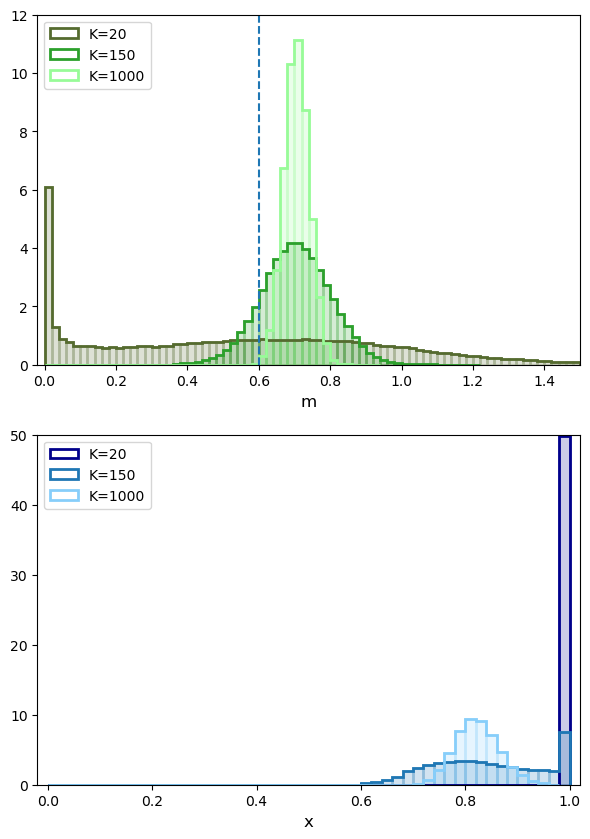

In [357]:
# For several values of K, without timescale separation, plot of the empirical stationary distributions

ic=[0.9,0.9]

bin_width = 0.02
time_tot=450000
time_tot=50000
#time_tot=10000
k=100
epsilon=0.1

k_values = [20, 150, 1000]
colors_m = ["darkolivegreen","tab:green","palegreen"]
colors_x=["darkblue", "tab:blue","lightskyblue"]
fig, ax = plt.subplots(2,1,figsize=(7,10))
ax=ax.ravel()
    
for i, k in enumerate(k_values):
    list_x=[ic[0]]
    list_m=[ic[1]]
    t=0
    for _ in range(int(time_tot/dt)-1):
        y=list_x[-1],list_m[-1]
        delta=dynamics(t,y)
        list_x.append(y[0]+delta[0]*dt)
        new_m=y[1]+delta[1]*dt + sqrt(s*epsilon) * sqrt(((lambd+mu)*y[1]+(lambd-mu)*y[1]**2)/k) * sqrt(dt)*np.random.normal(0,1)
        if new_m<=0:
            new_m=1/N
        list_m.append(new_m)
        
    below=[i for i in list_m if i<0.6]
    print(len(below)/len(list_m))
        
    bins_m = np.arange(0, min(max(list_m),1.5) + bin_width, bin_width)
    bins_x = np.arange(0, max(list_x) + bin_width, bin_width)
    ax[0].hist(list_m,bins=bins_m,density=True, color=colors_m[i],edgecolor=colors_m[i], alpha=0.2, linewidth=2)
    ax[0].hist(list_m,bins=bins_m,density=True, edgecolor=colors_m[i], histtype="step",linewidth=2, label=f"K={k}")
    ax[1].hist(list_x,bins=bins_x,density=True, color=colors_x[i],edgecolor=colors_x[i], alpha=0.2, linewidth=2)
    ax[1].hist(list_x,bins=bins_x,density=True, edgecolor=colors_x[i], histtype="step",linewidth=2, label=f"K={k}")
    
ax[0].vlines(0.6, linestyle="--", color="tab:blue", ymin=0, ymax=12)     
ax[0].set_xlim(-0.02, 1.5)
ax[0].set_ylim(0,12)
ax[0].set_xlabel("m", fontsize=12)
ax[0].legend(loc="upper left")

ax[1].set_xlim(-0.02, 1.02)
ax[1].set_ylim(0,50)
ax[1].set_xlabel("x", fontsize=12)
ax[1].legend(loc="upper left")

plt.savefig("distrib_estimation.png", dpi=300, bbox_inches='tight')
plt.show()

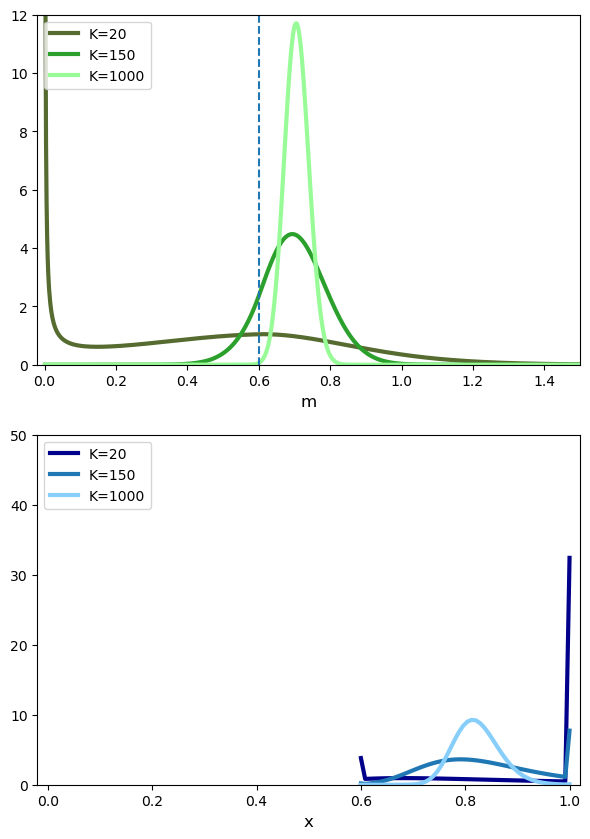

In [353]:
# For several values of K, with timescale separation, plot of the analytical stationary distributions


bin_width = 0.02
epsilon=1

a=Delta_1H+delta_0H
b=-delta_0H
c=Delta_1H-Delta_1L-delta_0L+delta_0H
d=delta_0L-delta_0H

m_L=delta_0L/(delta_0L+Delta_1L)
m_H=delta_0H/(delta_0H+Delta_1H)

k_values = [20, 150, 1000]
colors_m = ["darkolivegreen","tab:green","palegreen"]
colors_x=["darkblue", "tab:blue","lightskyblue"]
fig, ax = plt.subplots(2,1,figsize=(7,10))
ax=ax.ravel()
    
for i, k in enumerate(k_values):

    m_linspace=np.linspace(0.001,1.5,1000)
    ax[0].plot(m_linspace,integration_constant()*stationary_distrib(m_linspace),color=colors_m[i], label=f"K={k}", linewidth=3)


    x_linspace=np.linspace(calc_x(0.9999), calc_x(m_L),50)
    ax[1].plot(x_linspace,
               
               #for HG+SD
               #[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),calc_m(calc_x(0.999)+bin_width),10)[0]/bin_width]+
               #[integration_constant()*stationary_distrib(calc_m(x_i))*((c*calc_m(x_i)+d)**2)/(abs(a*d-c*b)) for x_i in x_linspace[1:-1]]+
               #[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.0001,calc_m(1-bin_width))[0]/bin_width],
               
               #for HG+SD
               [scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),calc_m(calc_x(0.999)+bin_width),10)[0]/bin_width]+
               [integration_constant()*stationary_distrib(calc_m(x_i))*((c*calc_m(x_i)+d)**2)/(abs(a*d-c*b)) for x_i in x_linspace[1:-1]]+
               [scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.0001,calc_m(1-bin_width))[0]/bin_width],
               
               color=colors_x[i], label=f"K={k}", linewidth=3)
    
    # for HG+PD
    #ax[1].plot([0+bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),calc_m(0.01),10)[0]*100],marker="s",color=colors_x[i], linewidth=2)
    #ax[1].plot([1-bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.001,calc_m(0.99))[0]*100],marker="s",color=colors_x[i], linewidth=2)

    # for HG+SD
    #ax[1].plot([m_L+bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),calc_m(calc_x(0.999)+bin_width),10)[0]/bin_width],marker="s",color=colors_x[i], markersize=5)
    #ax[1].plot([1-bin_width/2],[scipy.integrate.quad(lambda u:integration_constant()*stationary_distrib(u),0.0001,calc_m(1-bin_width))[0]/bin_width],marker="s",color=colors_x[i], markersize=5)

    # for PD+SH
    #ax[1].plot([0+bin_width/2],[100],marker="s",color=colors_x[i], linewidth=2)


ax[0].vlines(0.6, linestyle="--", color="tab:blue", ymin=0, ymax=12)    
ax[0].set_xlim(-0.02, 1.5)
ax[0].set_ylim(0,12)
ax[0].set_xlabel("m", fontsize=12)
ax[0].legend(loc="upper left")

ax[1].set_xlim(-0.02, 1.02)
ax[1].set_ylim(0,50)
ax[1].set_xlabel("x", fontsize=12)
ax[1].legend(loc="upper left")

plt.savefig("distrib_estimation.png", dpi=300, bbox_inches='tight')
plt.show()

## Plot of the bifurcation diagram of x

In [50]:
# General functions to plot the bifurcation diagram

def a(n):
    return (delta_0L-delta_0H)*(1-n) + (Delta_1H-Delta_1L)*n
def b(n):
    return delta_0H*(1-n) - Delta_1H*n

def linestyle(derivative):
    if derivative>=0:
        return ':'
    return "-"

def linewidth(derivative):
    if derivative>=0:
        return 2
    return 4
    
nb_pts=100

def bifurcation_diagram():
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(nb_pts):
        plt.plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="g")
        plt.plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="b")
        plt.plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="m")
    
    plt.ylim(-0.1,1.1)
    plt.xlabel("n")
    plt.ylabel("x*")
    plt.show()

    
def n_star():
    return (2*delta_0H + Delta_1H - delta_0L + sqrt((Delta_1H - delta_0L)**2 + 4*Delta_1L*delta_0H)) / (2*(Delta_1H-Delta_1L-delta_0L+delta_0H))


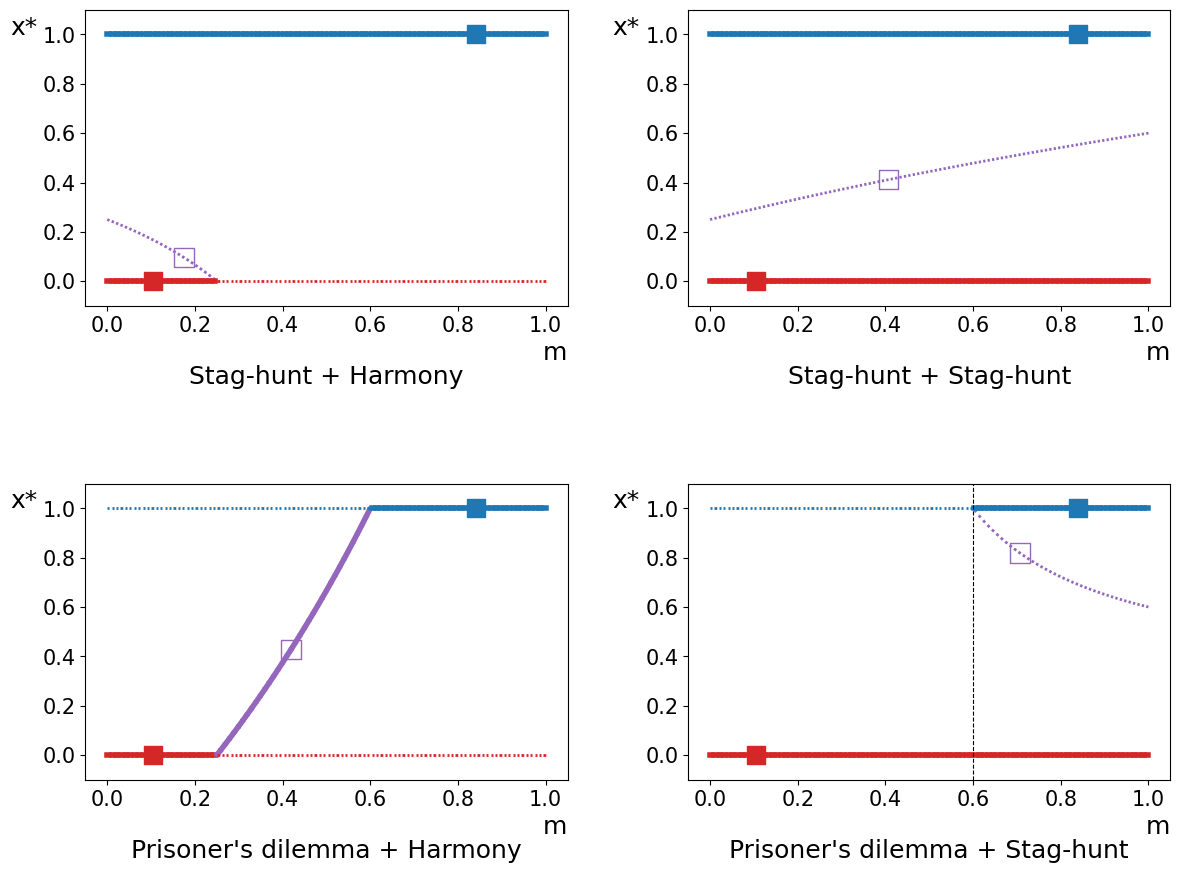

In [29]:
# Panel a

deltas=[(-2,-1,-3,3),(-2,-1,3,3),(-2,-1,-3,-3),(-2,-1,3,-3)]

nb_pts=200

def n_star():
    return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() + sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))



legends = {
    0: "Stag-hunt + Harmony",
    1: "Stag-hunt + Stag-hunt",
    2: "Prisoner's dilemma + Harmony",
    3: "Prisoner's dilemma + Stag-hunt",
}

fig, ax = plt.subplots(2,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))
    
    ax[j].text(0.5, -0.2, legends[j], transform=ax[j].transAxes, fontsize=18, ha='center', va='top')
    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.9)
    ax[j].tick_params(labelsize=15)
    
    ax[j].scatter([calc_m_from_n(n_star())],[n_star()],marker="s",color="tab:purple", s=200, facecolors="none")
    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150)
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150)

ax[3].vlines(0.6, linestyle="--", color="k", ymin=-0.1, ymax=1.1, linewidth=0.8)
plt.subplots_adjust(wspace=0.25, hspace=0.6)
#plt.tight_layout(pad=4)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

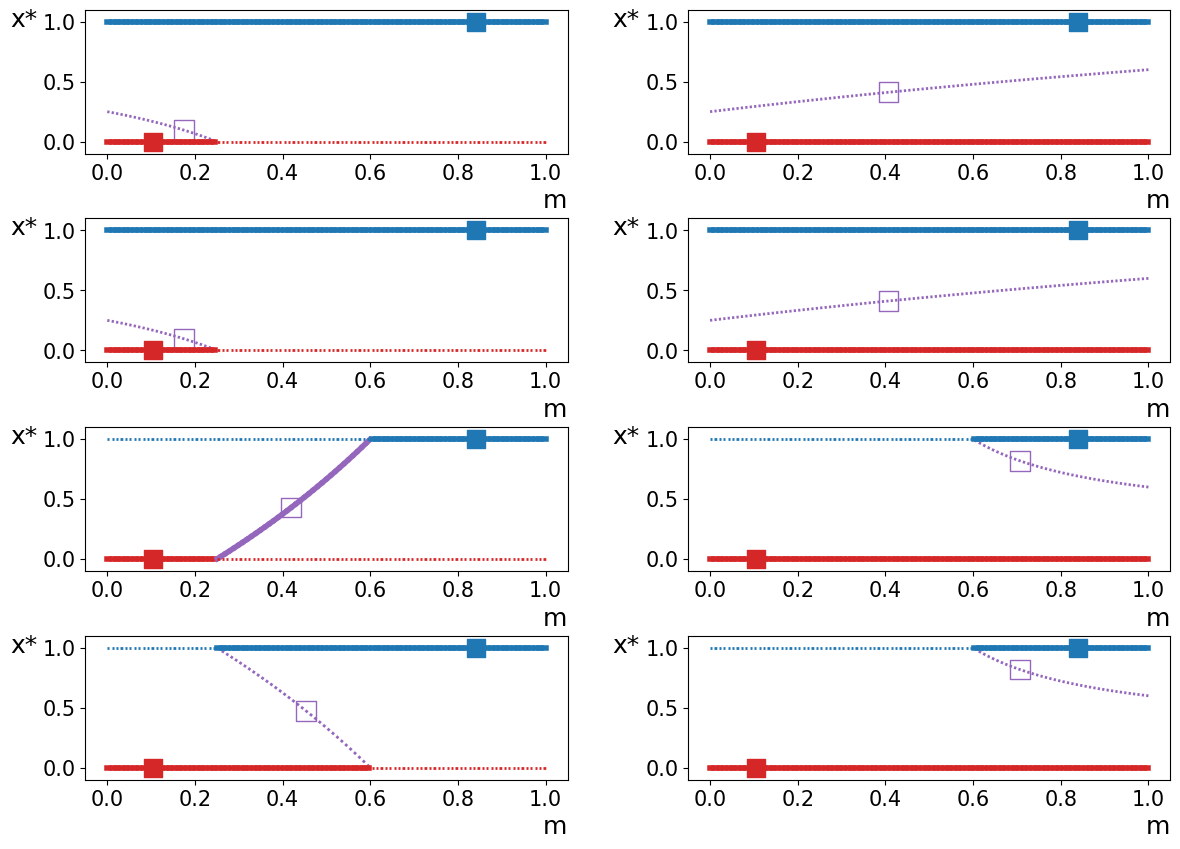

In [744]:
# Panel a

deltas=[(-2,-1,-3,3),(-2,-1,3,3),(-2,-1,-3,3),(-2,-1,3,3),(-2,-1,-3,-3),(-2,-1,3,-3),(-3,-3,-2,-1),(-2,-1,3,-3)]

nb_pts=200

legends = {
    2: "Stag-hunt + Harmony",
    3: "Stag-hunt + Stag-hunt",
    6: "Prisoner's dilemma + Harmony",
    7: "Prisoner's dilemma + Stag-hunt",
}

fig, ax = plt.subplots(4,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))

    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.85)
    ax[j].tick_params(labelsize=15)
    
    ax[j].scatter([calc_m_from_n(n_star())],[n_star()],marker="s",color="tab:purple", s=200, facecolors="none")
    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150)
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150)

plt.subplots_adjust(wspace=0.25, hspace=0.45)
#plt.tight_layout(pad=4)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

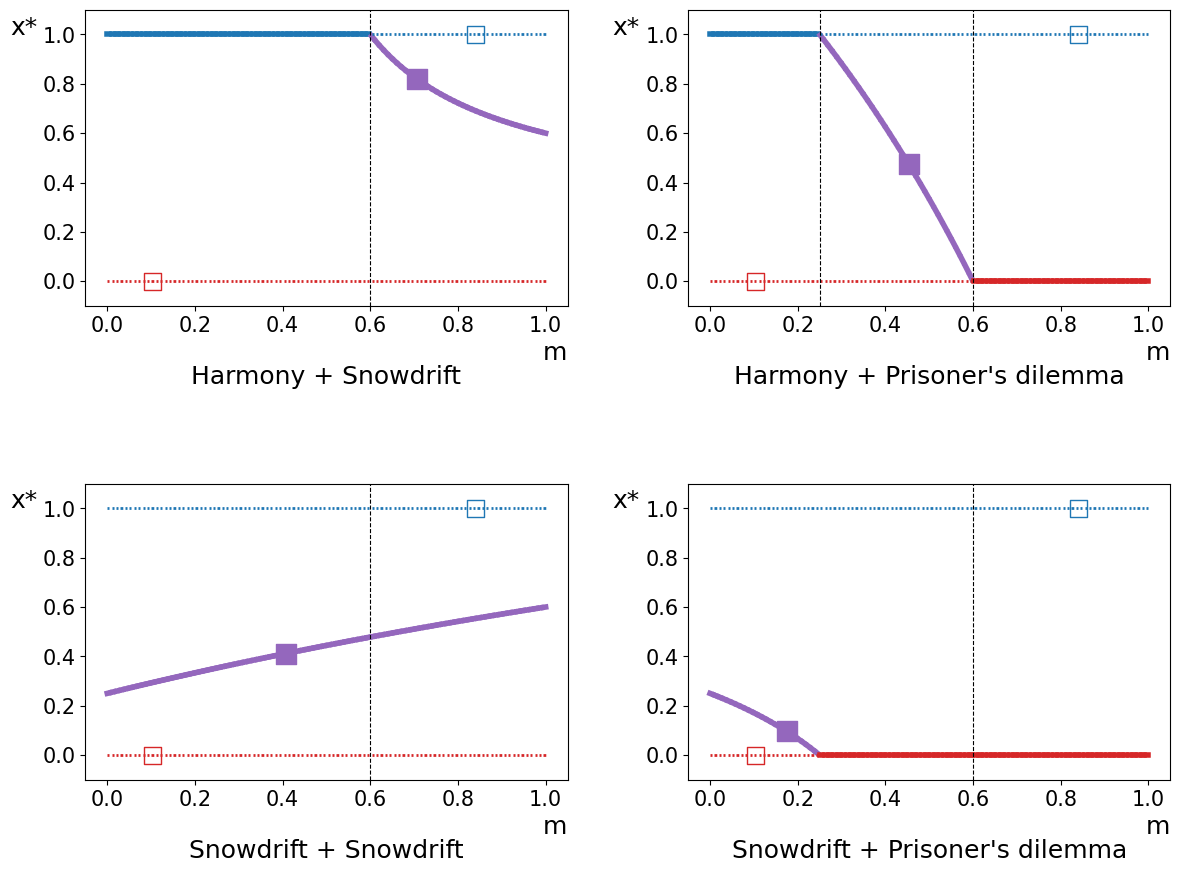

In [28]:
# Panel b

deltas=[(2,1,-3,3),(3,3,2,1),(2,1,-3,-3),(2,1,3,-3)]

nb_pts=200

def n_star():
    return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() - sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))


legends = {
    0: "Harmony + Snowdrift",
    1: "Harmony + Prisoner's dilemma",
    2: "Snowdrift + Snowdrift",
    3: "Snowdrift + Prisoner's dilemma",
}

fig, ax = plt.subplots(2,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))
    
    ax[j].text(0.5, -0.2, legends[j], transform=ax[j].transAxes, fontsize=18, ha='center', va='top')
    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.9)
    ax[j].tick_params(labelsize=15)

    ax[j].scatter([calc_m_from_n(n_star())],[n_star()],marker="s",color="tab:purple", s=200)
    
    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150, facecolors="none")
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150, facecolors="none")
    
    ax[j].vlines(0.6, linestyle="--", color="k", ymin=-0.1, ymax=1.1, linewidth=0.8)

    
ax[1].vlines(0.25, linestyle="--", color="k", ymin=-0.1, ymax=1.1, linewidth=0.8)
plt.subplots_adjust(wspace=0.25, hspace=0.6)
#plt.tight_layout(pad=4)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

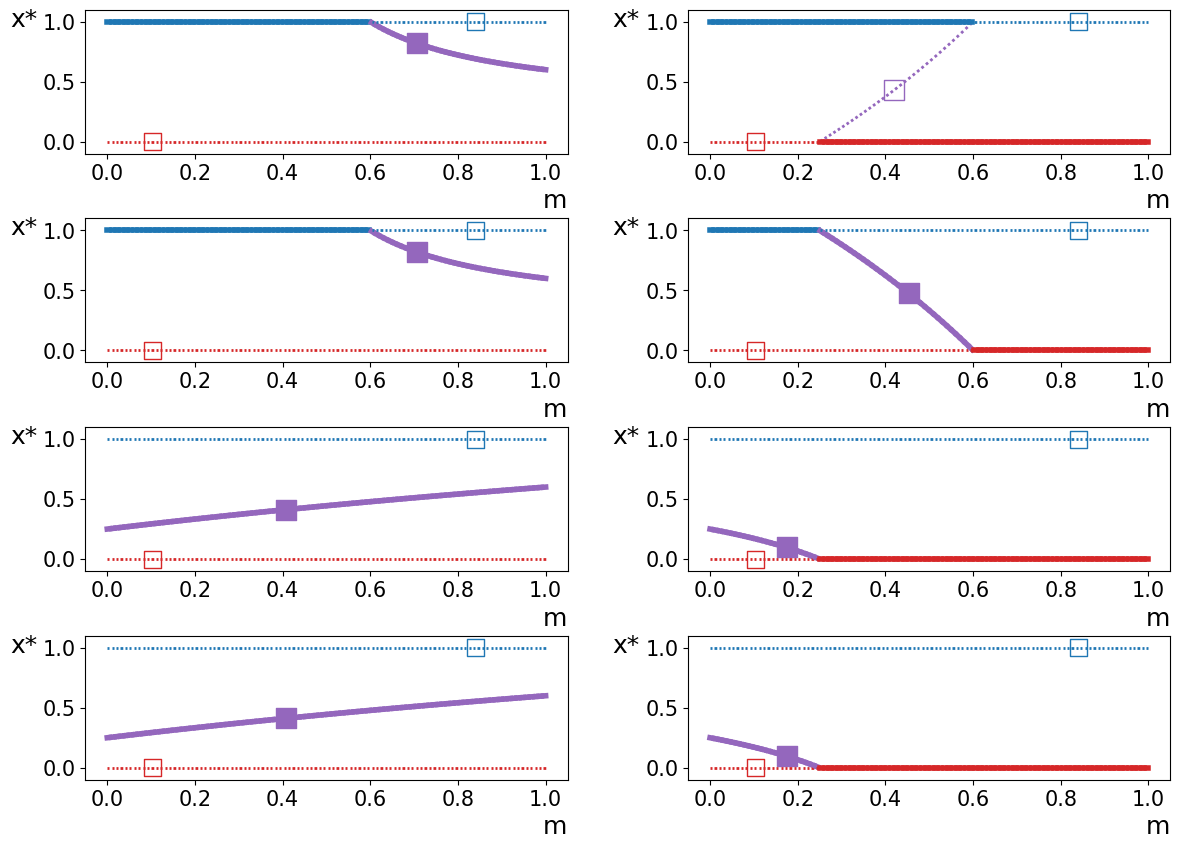

In [53]:
# Panel b

deltas=[(2,1,-3,3),(2,1,3,3),(2,1,-3,3),(3,3,2,1),(2,1,-3,-3),(2,1,3,-3),(2,1,-3,-3),(2,1,3,-3)]

nb_pts=200

def n_star():
    return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() - sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))


legends = {
    2: "Harmony + Snowdrift",
    3: "Harmony + Prisoner's dilemma",
    6: "Snowdrift + Snowdrift",
    7: "Snowdrift + Prisoner's dilemma",
}

fig, ax = plt.subplots(4,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))

    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.85)
    ax[j].tick_params(labelsize=15)


    if j!=1:
        ax[j].scatter([calc_m_from_n(n_star())],[n_star()],marker="s",color="tab:purple", s=200)
    else:
        ax[j].scatter([calc_m_from_n(n_star())],[n_star()],marker="s",color="tab:purple", s=200, facecolors="none")
        
    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150, facecolors="none")
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150, facecolors="none")

plt.subplots_adjust(wspace=0.25, hspace=0.45)
#plt.tight_layout(pad=4)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

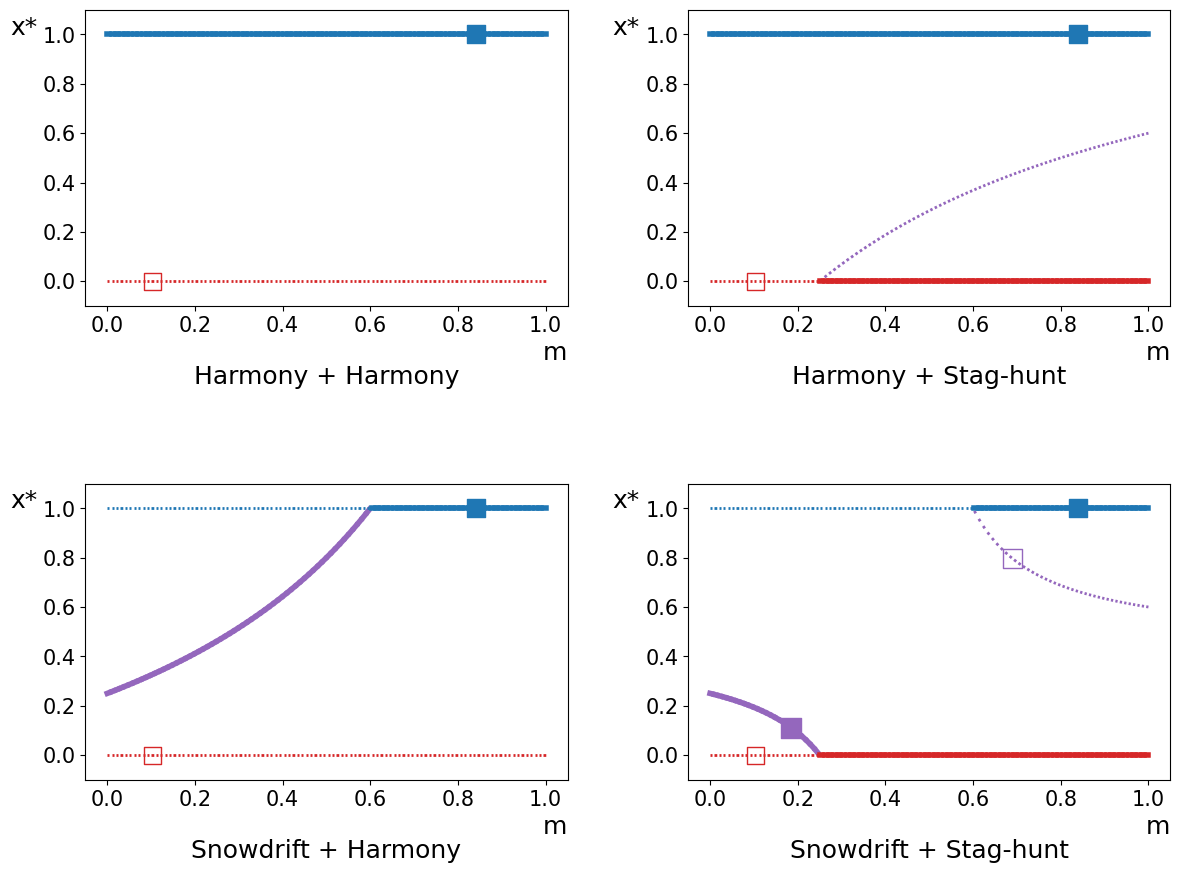

In [749]:
# Panel c

deltas=[(-2,1,-3,3),(-2,1,3,3),(-2,1,-3,-3),(-2,1,3,-3)]

def n_star_plus():
    if (Delta_1H - delta_0L)**2 + 4*Delta_1L*delta_0H>=0:
        return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() + sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))
    return "Inexistant"

def n_star_minus():
    if  (Delta_1H - delta_0L)**2 + 4*Delta_1L*delta_0H>=0:
        return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() - sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))
    return "Inexistant"


legends = {
    0: "Harmony + Harmony",
    1: "Harmony + Stag-hunt",
    2: "Snowdrift + Harmony",
    3: "Snowdrift + Stag-hunt",
}

fig, ax = plt.subplots(2,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))
    
    ax[j].text(0.5, -0.2, legends[j], transform=ax[j].transAxes, fontsize=18, ha='center', va='top')
    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.9)
    ax[j].tick_params(labelsize=15)

    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150, facecolors="none")
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150)
    
    if j==3:
        ax[j].scatter([calc_m_from_n(n_star_minus())],[n_star_minus()],marker="s",color="tab:purple", s=200)
        ax[j].scatter([calc_m_from_n(n_star_plus())],[n_star_plus()],marker="s",color="tab:purple", s=200, facecolors="none")
        
plt.subplots_adjust(wspace=0.25, hspace=0.6)
#plt.tight_layout(pad=3)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

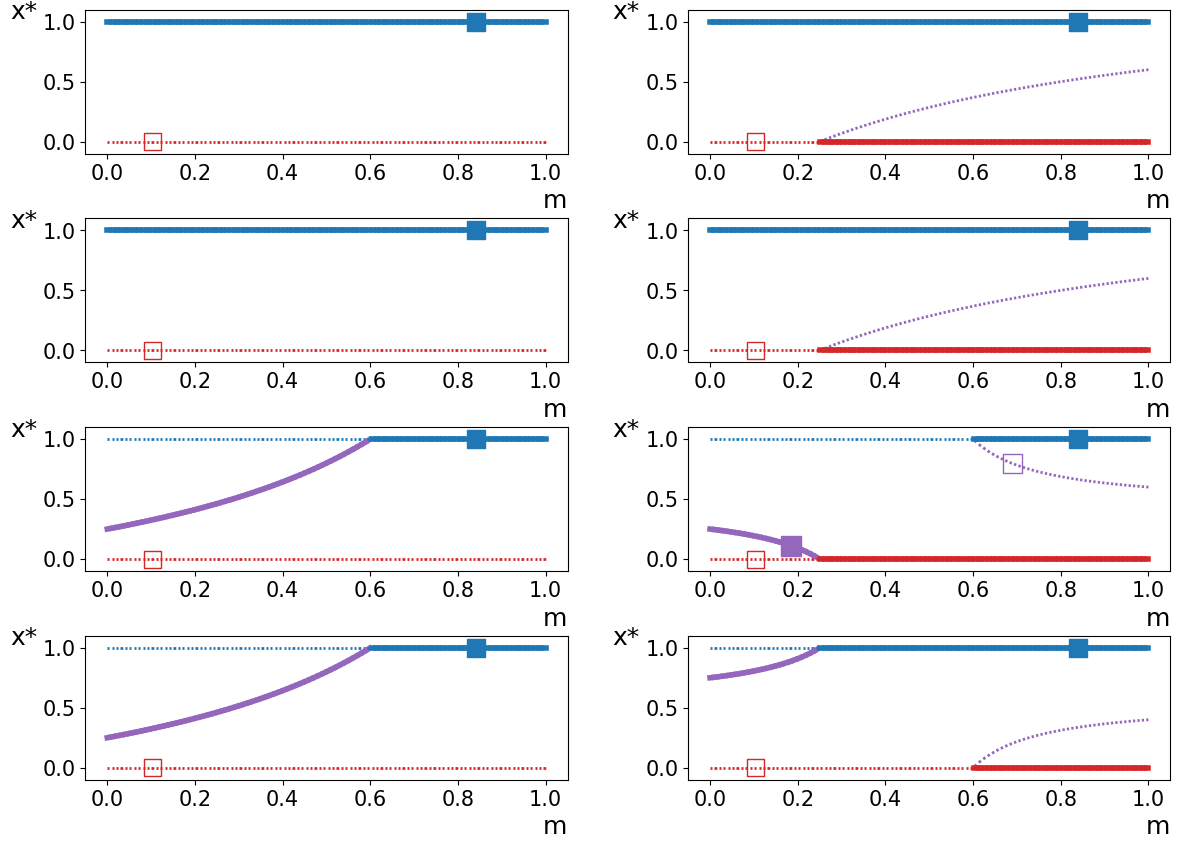

In [748]:
# Panel c

deltas=[(-2,1,-3,3),(-2,1,3,3),(-2,1,-3,3),(-2,1,3,3),(-2,1,-3,-3),(-2,1,3,-3),(-2,1,-3,-3),(-3,3,2,-1)]

def n_star_plus():
    if (Delta_1H - delta_0L)**2 + 4*Delta_1L*delta_0H>=0:
        return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() + sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))
    return "Inexistant"

def n_star_minus():
    if  (Delta_1H - delta_0L)**2 + 4*Delta_1L*delta_0H>=0:
        return (2*delta_0H_n() + Delta_1H_n() - delta_0L_n() - sqrt((Delta_1H_n() - delta_0L_n())**2 + 4*Delta_1L_n()*delta_0H_n())) / (2*(Delta_1H_n()-Delta_1L_n()-delta_0L_n()+delta_0H_n()))
    return "Inexistant"


legends = {
    2: "Harmony + Harmony",
    3: "Harmony + Stag-hunt",
    6: "Snowdrift + Harmony",
    7: "Snowdrift + Stag-hunt",
}

fig, ax = plt.subplots(4,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))
    
    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.9)
    ax[j].tick_params(labelsize=15)

    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150, facecolors="none")
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150)
    
    if j==5:
        ax[j].scatter([calc_m_from_n(n_star_minus())],[n_star_minus()],marker="s",color="tab:purple", s=200)
        ax[j].scatter([calc_m_from_n(n_star_plus())],[n_star_plus()],marker="s",color="tab:purple", s=200, facecolors="none")
         
plt.subplots_adjust(wspace=0.25, hspace=0.45)
#plt.tight_layout(pad=3)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

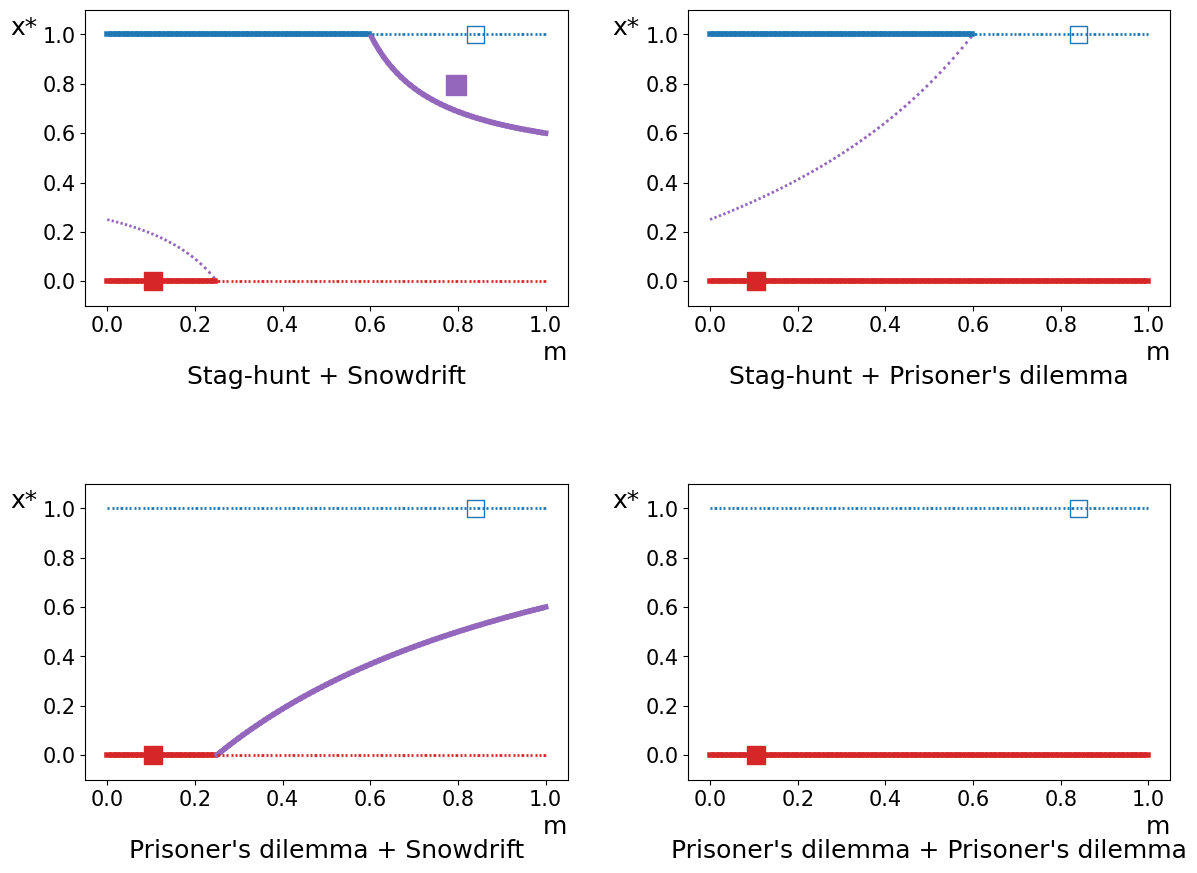

In [750]:
# Panel d

deltas=[(2,-1,-3,3),(2,-1,3,3),(2,-1,-3,-3),(2,-1,3,-3)]

legends = {
    0: "Stag-hunt + Snowdrift",
    1: "Stag-hunt + Prisoner's dilemma",
    2: "Prisoner's dilemma + Snowdrift",
    3: "Prisoner's dilemma + Prisoner's dilemma",
}

fig, ax = plt.subplots(2,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))
    
    ax[j].text(0.5, -0.2, legends[j], transform=ax[j].transAxes, fontsize=18, ha='center', va='top')
    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.9)
    ax[j].tick_params(labelsize=15)
    
    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150)
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150, facecolors="none")
    
    if j==0:
        ax[j].scatter([n_star_minus()],[n_star_minus()],marker="s",color="tab:purple", s=200)

plt.subplots_adjust(wspace=0.25, hspace=0.6)
#plt.tight_layout(pad=3)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()

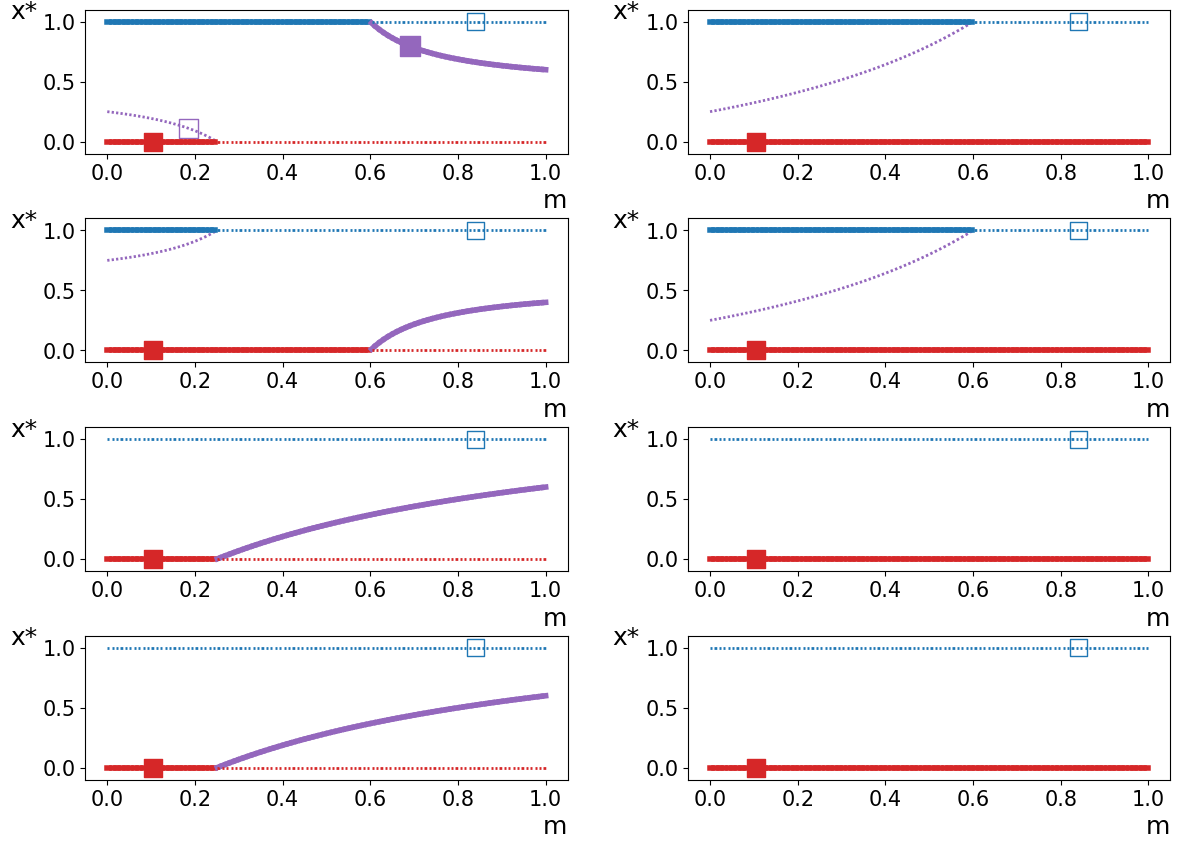

In [751]:
# Panel d

deltas=[(2,-1,-3,3),(2,-1,3,3),(3,-3,-2,1),(2,-1,3,3),(2,-1,-3,-3),(2,-1,3,-3),(2,-1,-3,-3),(2,-1,3,-3)]

legends = {
    2: "Stag-hunt + Snowdrift",
    3: "Stag-hunt + Prisoner's dilemma",
    6: "Prisoner's dilemma + Snowdrift",
    7: "Prisoner's dilemma + Prisoner's dilemma",
}

fig, ax = plt.subplots(4,2,figsize=(14,10))
ax=ax.ravel()
for j,d in enumerate(deltas):
    Delta_1L=d[0]
    delta_0H=d[1]
    Delta_1H=d[2]
    delta_0L=d[3]
    
    list_n=np.linspace(0,1,nb_pts)
    list_a=a(list_n)
    list_b=b(list_n)
    list_x_star=-list_b/list_a
    list_d2x_star=list_x_star * (list_a+list_b)
    list_1=[1]*nb_pts
    list_d2x_1=-(list_a+list_b)
    list_0=[0]*nb_pts
    list_d2x_0=list_b
    
    for i in range(0,nb_pts-1,2):
        if list_x_star[i]>0 and list_x_star[i]<1:
            ax[j].plot(list_n[i:i+2], list_x_star[i:i+2], linestyle(list_d2x_star[i]), color="tab:purple", linewidth=linewidth((list_d2x_star[i])))
        ax[j].plot(list_n[i:i+2], list_1[i:i+2], linestyle(list_d2x_1[i]), color="tab:blue", linewidth=linewidth((list_d2x_1[i])))
        ax[j].plot(list_n[i:i+2], list_0[i:i+2], linestyle(list_d2x_0[i]), color="tab:red", linewidth=linewidth((list_d2x_0[i])))
    
    ax[j].set_ylim(-0.1,1.1)
    ax[j].set_xlabel("m", fontsize=18,loc="right")
    ax[j].set_ylabel("x*", fontsize=18, loc="top", rotation=0, labelpad=20)
    ax[j].yaxis.set_label_coords(-0.1, 0.9)
    ax[j].tick_params(labelsize=15)
    
    ax[j].scatter(1-q*e_H/r,0,marker="s",color="tab:red", s=150)
    ax[j].scatter(1-q*e_L/r,1,marker="s",color="tab:blue", s=150, facecolors="none")
    
    if j==0:
        ax[j].scatter([calc_m_from_n(n_star_minus())],[n_star_minus()],marker="s",color="tab:purple", s=200)
        ax[j].scatter([calc_m_from_n(n_star_plus())],[n_star_plus()],marker="s",color="tab:purple", s=200, facecolors="none")
        
plt.subplots_adjust(wspace=0.25, hspace=0.45)
#plt.tight_layout(pad=3)
plt.savefig("bifurcation.png", dpi=300, bbox_inches='tight')
plt.show()